# Search for candidate subgraphs in the empirical graph

### Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import networkx as nx

### Set globals for plotting

In [3]:
sns.set(
    context="talk",
    font_scale=1,  # make the font larger; default is pretty small
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

### Load empirical graph


In [6]:
G = nx.read_gpickle("empirical.pickle")

### Try an $A \land B$ gate

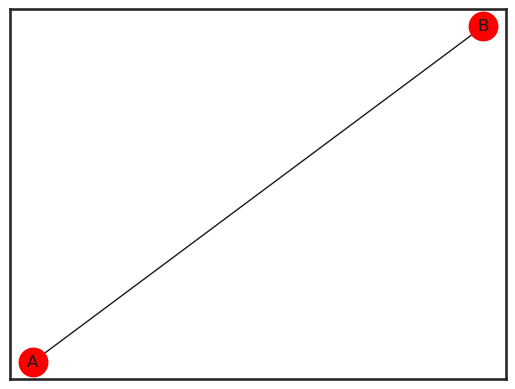

In [7]:
gate_states = [
    # A B
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
]

truth_vector = np.array([0, 0, 0, 1])


and_edges = [("A", "B")]
AND_gate = nx.Graph()
AND_gate.add_edges_from(and_edges)

options = {"node_color": "red", "node_size": 400, "alpha": 1.0}
nx.draw_networkx(AND_gate, with_labels=True, **options)
plt.show()

### Search for all possible AND gates in the empirical graph
I believe the number should equal the number of edges

In [9]:
import networkx.algorithms.isomorphism as isomorphism
AND_matcher = isomorphism.GraphMatcher(G, AND_gate)
AND_matcher.subgraph_is_isomorphic()

True

In [10]:
i = 0
for candidate in AND_matcher.subgraph_isomorphisms_iter():
    i += 1
print(i, len(G.edges()))

112 56


ok there's exactly twice as many, symmetry strikes again. 

### Let's try something a little crazier, an $((A \land B) \lor C) \land \lnot D$ gate
 

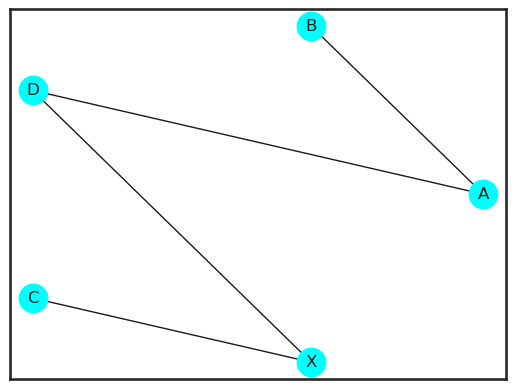

In [11]:
gate_states = [
#    A  B  C  D
    [0, 0, 0, 0],
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [1, 1, 0, 0],
    [1, 0, 1, 0],
    [1, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 1],
    [1, 1, 1, 0],
    [1, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 1, 1],
    [1, 1, 1, 1],
]

truth_vector = np.array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

bigger_gate = nx.Graph()
bigger_gate.add_edges_from([("A", "B"), ("A", "D"), ("C", "X"), ("D", "X")])

options = {"node_color": "cyan", "node_size": 400, "alpha": 1.0}
nx.draw_networkx(
    bigger_gate, nx.circular_layout(bigger_gate), with_labels=True, **options
)
plt.show()

D competes with B for A and competes with C for X (need to win to achieve NOT behavior)

In [12]:
bigger_matcher = isomorphism.GraphMatcher(G, bigger_gate)
bigger_matcher.subgraph_is_isomorphic()

True

In [13]:
for candidate in bigger_matcher.subgraph_isomorphisms_iter():
    print(candidate)
    

{'BW3_B_lg': 'A', 'IL8_A_sm': 'B', 'IL8_B_sm': 'D', 'IL9_B_lg': 'X', 'IL9_A_sm': 'C'}
{'BW3_B_lg': 'A', 'IL8_A_sm': 'B', 'IL8_B_sm': 'D', 'BW3_A_lg': 'X', 'BW3_B_sm': 'C'}
{'BW3_B_lg': 'A', 'IL8_A_sm': 'B', 'BW3_A_sm': 'D', 'IL9_B_lg': 'X', 'IL9_A_sm': 'C'}
{'BW3_B_lg': 'A', 'IL8_A_sm': 'B', 'BW3_A_sm': 'D', 'BW3_A_lg': 'X', 'BW3_B_sm': 'C'}
{'BW3_B_lg': 'A', 'IL8_A_sm': 'B', 'IL9_B_sm': 'D', 'IL9_B_lg': 'X', 'IL9_A_sm': 'C'}
{'BW3_B_lg': 'A', 'IL8_A_sm': 'B', 'IL9_B_sm': 'D', 'BW3_A_lg': 'X', 'BW3_B_sm': 'C'}
{'BW3_B_lg': 'A', 'IL8_A_sm': 'B', 'IL14_B_sm': 'D', 'IL9_B_lg': 'X', 'IL9_A_sm': 'C'}
{'BW3_B_lg': 'A', 'IL8_A_sm': 'B', 'BW5_A_sm': 'D', 'IL9_B_lg': 'X', 'IL9_A_sm': 'C'}
{'BW3_B_lg': 'A', 'IL8_A_sm': 'B', 'BW5_A_sm': 'D', 'BW3_A_lg': 'X', 'BW3_B_sm': 'C'}
{'BW3_B_lg': 'A', 'IL14_B_sm': 'B', 'IL8_B_sm': 'D', 'BW3_A_lg': 'X', 'BW3_B_sm': 'C'}
{'BW3_B_lg': 'A', 'IL14_B_sm': 'B', 'BW3_A_sm': 'D', 'BW3_A_lg': 'X', 'BW3_B_sm': 'C'}
{'BW3_B_lg': 'A', 'IL14_B_sm': 'B', 'IL9_B_sm': 'D'